<font size=7> Eigendecomposition Plots

In [1]:
from human_hip import spike_data

# Old Code

In [2]:
import numpy as np                                                    # Packages for data analysis
import matplotlib.pyplot as plt
from human_hip.spike_data.analysis import correlation_matrix, eigenvalues_eigenvectors #firing_rates,

In [3]:
def plot_eigenvectors(sd, n_eigenvectors=5 ):
    corr_matrix = correlation_matrix(sd)
    sttc_matrix = sd.spike_time_tilings()
    corr_eigenvalues, corr_eigenvectors = eigenvalues_eigenvectors(corr_matrix)
    sttc_eigenvalues, sttc_eigenvectors = eigenvalues_eigenvectors(sttc_matrix)
    
    fig, axs = plt.subplots(5, 2, figsize=(12,8)) #,  )

    for i in range(n_eigenvectors):
        #if i: plt.xticks([])
        axs[i,0].stem(sttc_eigenvectors[:,i])
        axs[i,1].stem(corr_eigenvectors[:,i])
        axs[i,0].set(ylabel= f"{i+1}")
        
        ylim_min = np.min([sttc_eigenvectors[:,i], corr_eigenvectors[:,i]]) -.1
        ylim_max = np.max([sttc_eigenvectors[:,i], corr_eigenvectors[:,i]]) +.1
        axs[i,0].set_ylim(ylim_min, ylim_max)
        axs[i,1].set_ylim(ylim_min, ylim_max)

    for ax in fig.get_axes():
        ax.label_outer()
    axs[0, 0].set_title("STTC")
    axs[0, 1].set_title("Correlation")




In [4]:
def plot_eigen_vector_layout(sd, vect, show_sttc=False, sttc_threshold=.1, plot_color="magma", xlim=None, ylim=None):
    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])

    plt.figure(figsize=(10,7)) 
    ax = plt.axes()
    if xlim: ax.set_xlim(xlim)
    if ylim: ax.set_ylim(ylim)
    ax.set_facecolor((0.6, 0.6, 0.6)) 
    plt.scatter(neuron_x,neuron_y,  c=vect, cmap=plot_color) # s=firing_rates(sd)*20, # color each plotted neuron according to the values of the eigenvector
   
    if show_sttc:
        sttc = sd.spike_time_tilings()
        for i in range(sttc.shape[0]): # plot connectivity lines between neurons
            for j in range(sttc.shape[1]):
                # Only need to do upper triangle since sttc' = sttc
                if i<=j: continue
                if sttc[i,j] < sttc_threshold : continue
                #Position of neuron i
                ix,iy = sd.neuron_data[0][i]['position']
                jx,jy = sd.neuron_data[0][j]['position']
                # Plot line between the points, linewidth is the sttc
                plt.plot([ix,jx],[iy,jy], linewidth=sttc[i,j],c='k')
            
    plt.xlabel('um')
    plt.ylabel('um')
    plt.title("Neuron layout")
    plt.colorbar()
    plt.show()



In [5]:
# def plot_eigendecomposition_vector(sd, vector_index=0, use_sttc=True, sttc_cutoff_high=1.1, show_sttc=False, show_threshold=0.1,
#                                      plot_color="magma", xlim=None, ylim=None):
#     sd_matrix = sd.spike_time_tilings() if use_sttc else correlation_matrix(sd)
#     if use_sttc:
#         sd_matrix = np.where(sd_matrix<sttc_cutoff_high, sd_matrix, sd_matrix*0)
#     eigenvalues, eigenvectors = eigenvalues_eigenvectors(sd_matrix)
#     plot_eigen_vector_layout(sd, eigenvectors[:, vector_index], show_sttc, show_threshold,  plot_color, xlim, ylim)


# HC21769 - acid

# no cuttoff

In [6]:
sd = spike_data.read_phy_files("/workspaces/human_hippocampus/data/ephys/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/elliott/elliott_chip21769_2.zip")


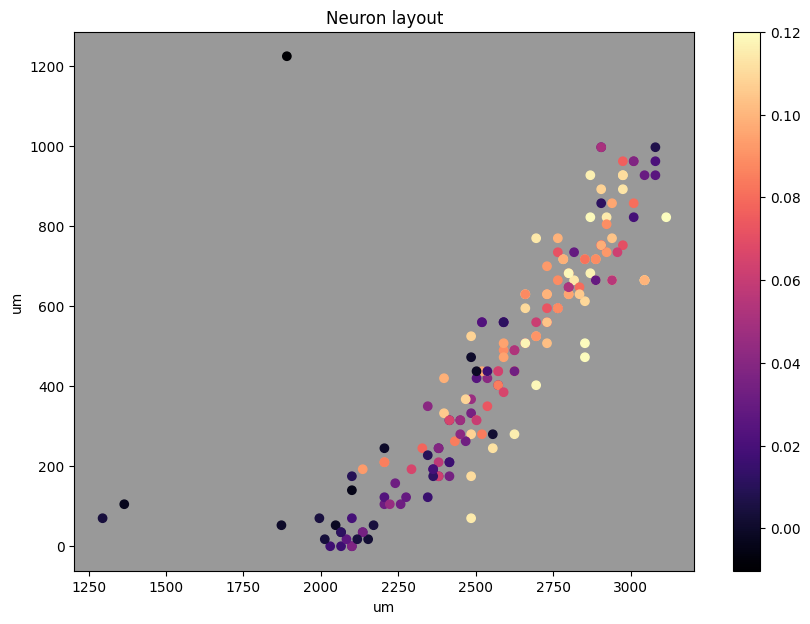

In [7]:
spike_data.plot_eigendecomposition_vector( sd )

## Cuttoff of 0.3

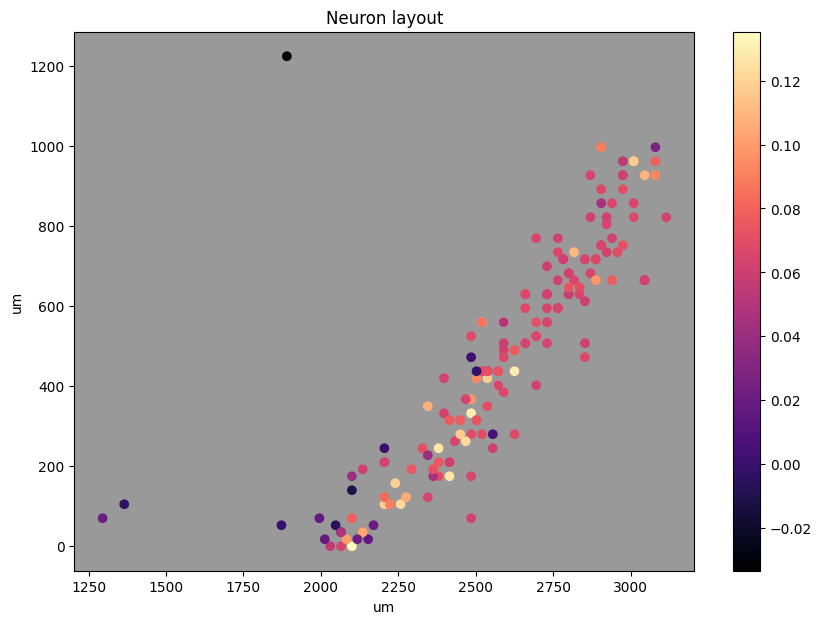

In [8]:
spike_data.plot_eigendecomposition_vector( sd, sttc_cutoff_high=0.3 )

In [9]:
sd_matrix = sd.spike_time_tilings()
sd_matrix = np.where(sd_matrix<0.3, sd_matrix, sd_matrix*0)
eigenvalues, eigenvectors = eigenvalues_eigenvectors(sd_matrix)

In [10]:
# plot_eigen_vector_layout(sd, eigenvectors[:,0]) # show_sttc=False , plot_color, xlim, ylim)


/tmp/ipykernel_3522/2971679646.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array


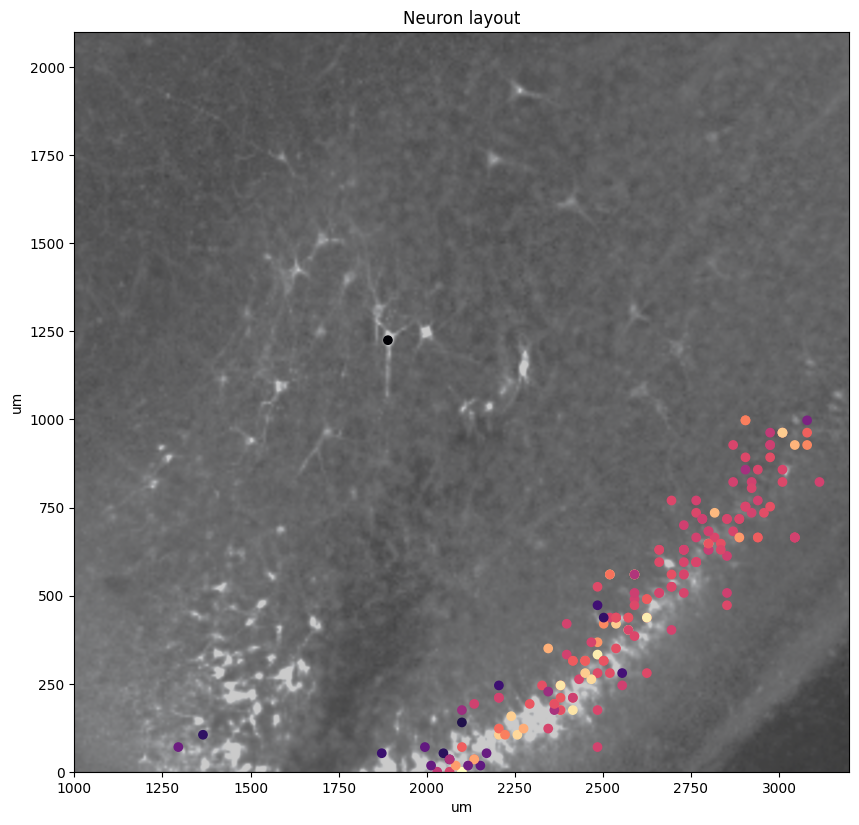

In [11]:
    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])

    plt.figure(figsize=(10,10)) 
    img = plt.imread("/workspaces/human_hippocampus/data/histology/chip21769_bw2.png")      # Load in image
    plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions
    #ax = plt.axes()
    plt.xlim(1000, 3200)
    plt.ylim(0,2100)
    #ax.set_facecolor((0.6, 0.6, 0.6)) 
    plt.scatter(neuron_x,neuron_y,  c=eigenvectors[:,0], cmap="magma") # s=firing_rates(sd)*20, # color each plotted neuron according to the values of the eigenvector
   
    plt.xlabel('um')
    plt.ylabel('um')
    plt.title("Neuron layout")
    #plt.colorbar()
    plt.show()


# HC112823 - acid

In [12]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


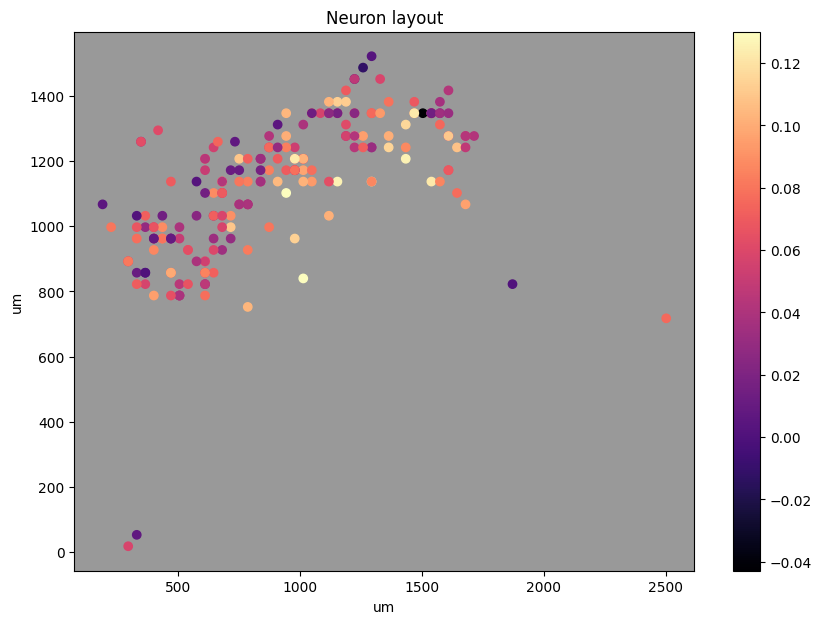

In [13]:
spike_data.plot_eigendecomposition_vector( sd, sttc_cutoff_high=0.3 )

In [14]:
sd_matrix = sd.spike_time_tilings()
sd_matrix = np.where(sd_matrix<0.3, sd_matrix, sd_matrix*0)
eigenvalues, eigenvectors = eigenvalues_eigenvectors(sd_matrix)

/tmp/ipykernel_3522/349813288.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array


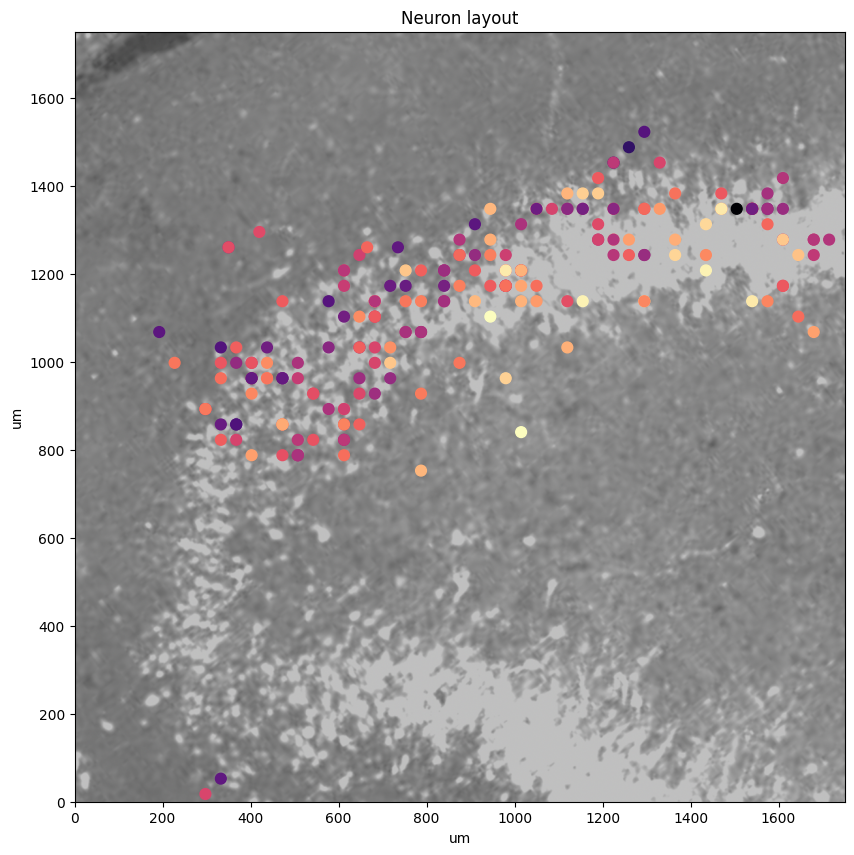

In [15]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])

plt.figure(figsize=(10,10)) 
img = plt.imread("/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions
#ax = plt.axes()
plt.xlim(0, 1750)
plt.ylim(0,1750)
#ax.set_facecolor((0.6, 0.6, 0.6)) 
plt.scatter(neuron_x,neuron_y,  c=eigenvectors[:,0], cmap="magma", s=60) # s=firing_rates(sd)*20, # color each plotted neuron according to the values of the eigenvector

plt.xlabel('um')
plt.ylabel('um')
plt.title("Neuron layout")
#plt.colorbar()
plt.show()
